## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Tomás
- Apellido: Di Natale
- Legajo: 158.811-4

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [3]:
diabetes_df = pd.read_csv('ClusterAI_TP_dataset_diabetes.csv') #importo dataset
diabetes_df.head() #compruebo que se haya importado correctamente mirando los primeros 5 registros

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [7]:
diabetes_df.shape

(768, 9)

In [8]:
np.shape(diabetes_df) #otra forma de hacerlo

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [24]:
# PISTA: con una sola línea de código podríamos obtener toda esta información

col_info = pd.concat([diabetes_df.dtypes,diabetes_df.isnull().sum()],axis=1).rename(columns={0:"Tipo",1:"Nulos"}) #concateno la columna tipo de variable y la suma de nulos por columna y les cambio el nombre
col_info 


,Tipo,Nulos
Pregnancies,int64,0
Glucose,int64,0
BloodPressure,int64,0
SkinThickness,int64,0
Insulin,int64,0
BMI,float64,0
DiabetesPedigreeFunction,float64,0
Age,int64,0
Outcome,int64,0


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

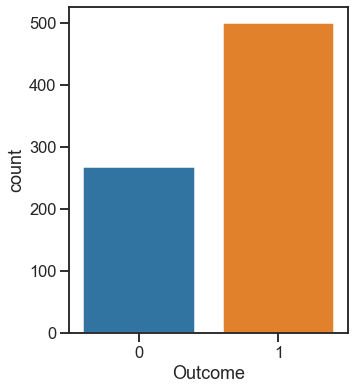

In [137]:
plt.figure(figsize=(5,6))
sns.countplot(data=diabetes_df.Outcome,x=diabetes_df.Outcome) #countplot de la variable
plt.xlabel("Outcome")
diabetes_df.Outcome.describe() #descripcion de la variable

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [26]:
diabetes_df.describe() #descripcion de metricas estadisiticas de cada feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

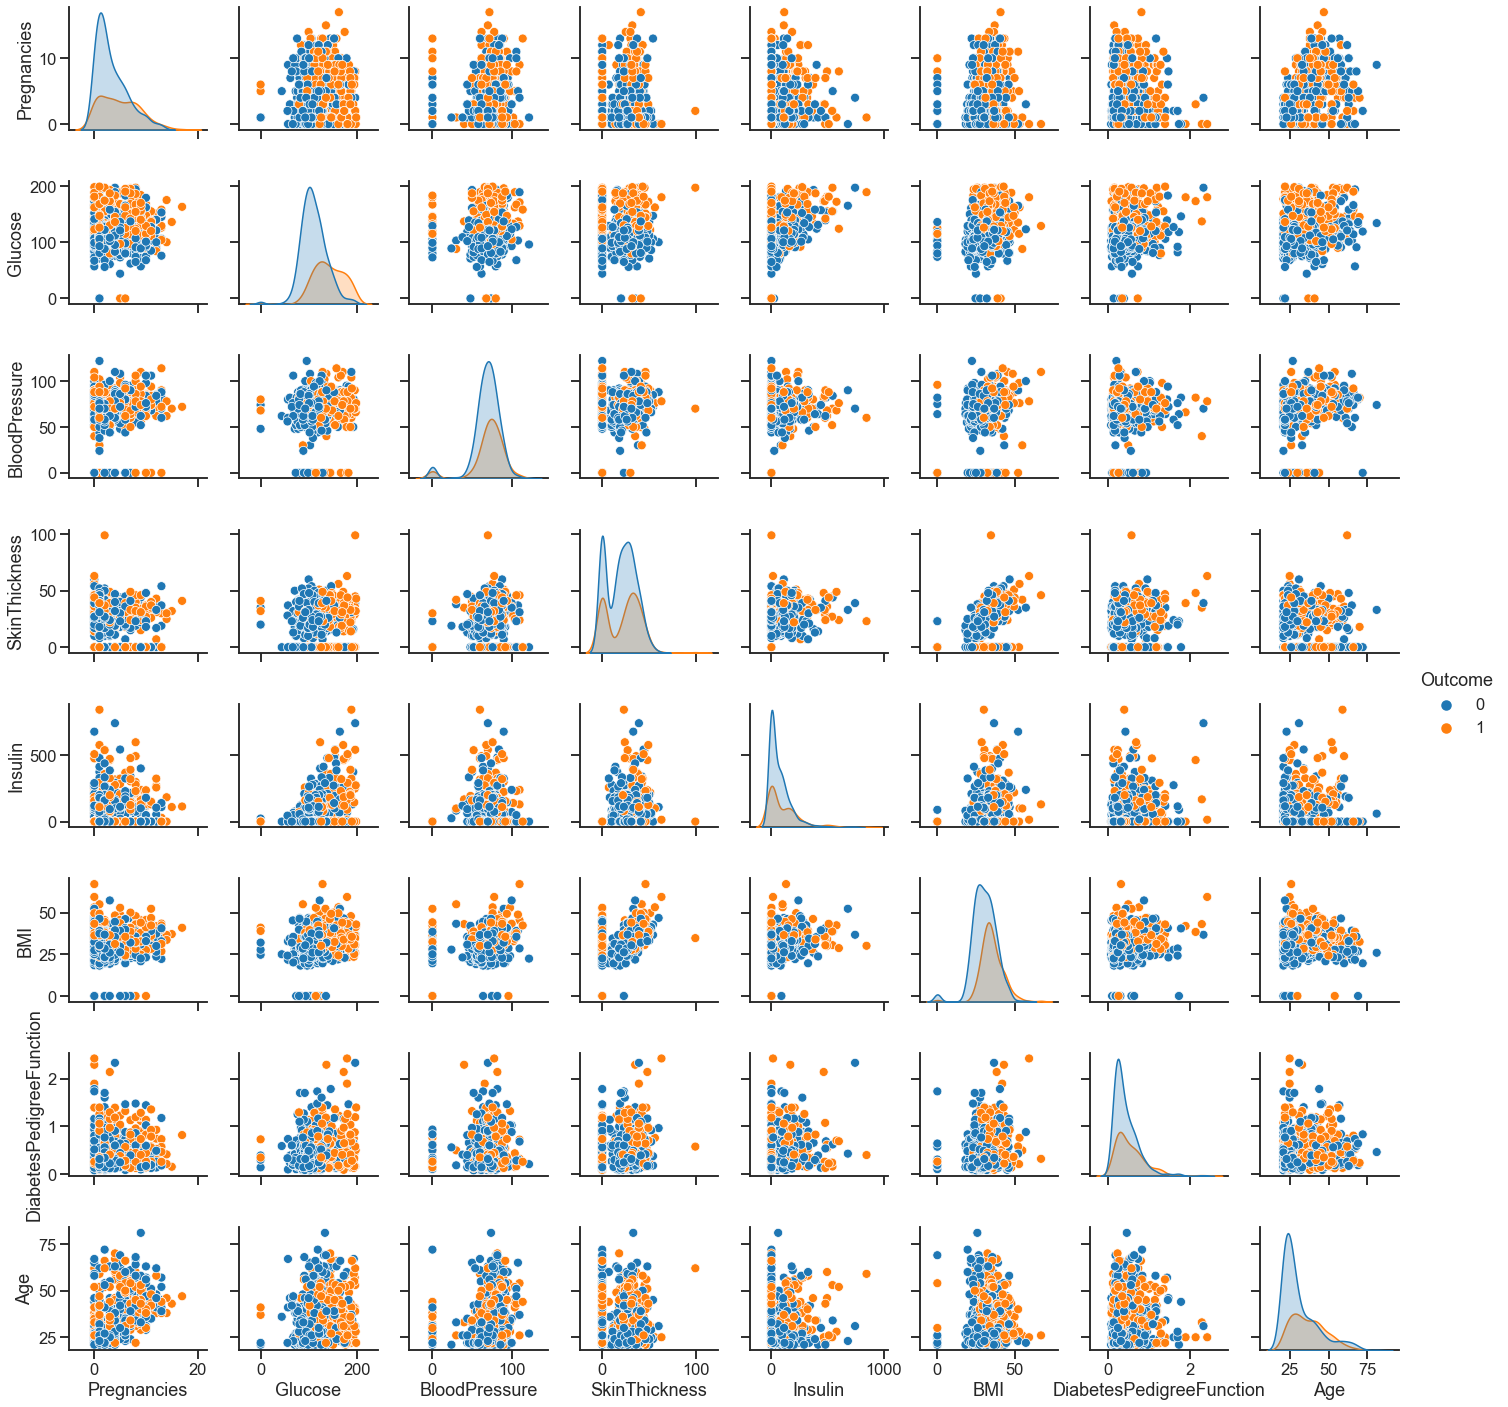

In [30]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.pairplot(diabetes_df, hue="Outcome") # divido con colores pacientes con/sin diabetes
plt.show()

La glucosa parece ser el feature más relevante para predecir la diabetes ya que las distribuciones son las más diferentes entre pacientes con y sin diabetes (hay una frontera más clara entre los datos). A simple vista el BMI parecería estar en segundo lugar.

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


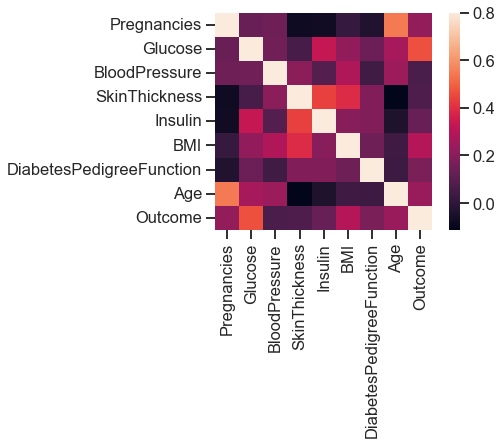

In [35]:
corrmat = diabetes_df.corr() #matriz de correlacion
sns.heatmap(corrmat, vmax=.8, square=True); #heatmap de la matriz para visualizarla mas facilmente
corrmat
def get_redundant_pairs(df):
    '''selecciona los datos en la diagonal para excluirlos en la proxima funcion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
#defino 2 funciones que voy a utilizar para detectar las correlaciones mas fuertes excluyendo la diagonal de la matiz (correlaciones de variables consigo mismas)

Las variables mas correlacionadas son Age-Pregnancies (0.544341)

In [39]:
print(get_top_abs_correlations(diabetes_df, 2)) #imprimo las correlaciones mas fuertes en valor absoluto

Pregnancies  Age        0.544341
Glucose      Outcome    0.466581
dtype: float64


En la fórmula de arriba se encuentran expresados en valor absoluto las correlaciones sin embargo ambas son positivas. Esto corrobora lo que se ve en el pairplot (glucosa es el feature más importante para predecir diabetes). En principio las correlaciones no parecen ser suficientemente fuertes como para excluir alguna de las variables, sin embargo es evidente que, si quisieramos usar estos datos para armar un modelo cuyo fin sea predecir si un paciente tendrá diabetes, el feature con mayor peso debería ser la cocnentración de glucosa.

##### **Objetivo 8**
Hacer un histograma de la variable BMI

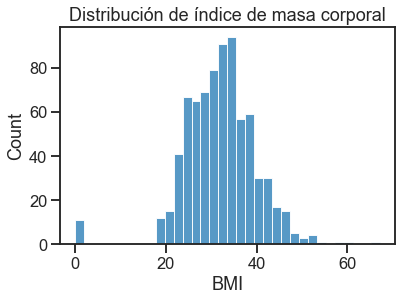

In [57]:
sns.histplot(data=diabetes_df.BMI)
plt.title('Distribución de índice de masa corporal')
plt.xlabel('BMI')
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

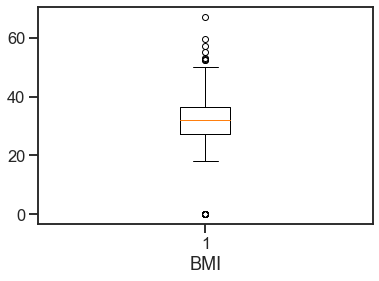

In [90]:
plt.boxplot(diabetes_df.BMI)
plt.xlabel('BMI')
plt.show()

In [91]:
print('Se ven '+ str((diabetes_df.BMI.values == diabetes_df.BMI.min()).sum()) +' claros outliers con valor ' + str(diabetes_df.BMI.min()) + ' en el mínimo')

Se ven 11 outliers con valor 0.0 en el mínimo


##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [97]:
diabetes_df_filtrado = diabetes_df.loc[diabetes_df['BMI'] != diabetes_df.BMI.min()] 
np.shape(diabetes_df_filtrado) # print de tamaño de dataset filtrado, coincide con los 11 valores que muestro arriba

(757, 9)

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

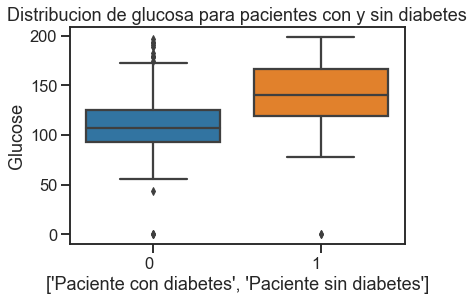

In [101]:
ay = sns.boxplot(x = diabetes_df_filtrado.Outcome, y = diabetes_df_filtrado.Glucose, data = diabetes_df_filtrado)
ay.set_xticklabels(ay.get_xticklabels(), ha="right")
plt.title("Distribucion de glucosa para pacientes con y sin diabetes")
plt.xlabel(["Paciente sin diabetes",'Paciente con diabetes'])
plt.show()

Los pacientes con diabetes suelen tener mayores niveles de concentración de glucosa (la mediana de los pacientes con diabetes se encuentra por encima de la concentración del 75% de aquellos que no tienen diabetes)

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

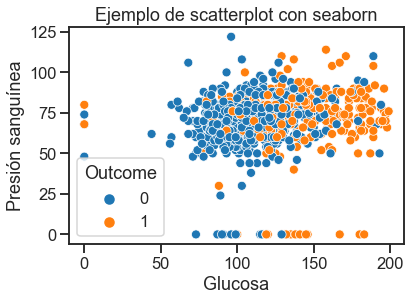

In [105]:
sns.scatterplot(x= diabetes_df_filtrado.Glucose, y= diabetes_df_filtrado.BloodPressure,hue=diabetes_df_filtrado.Outcome)
plt.title("Ejemplo de scatterplot con seaborn")
plt.xlabel("Glucosa")
plt.ylabel("Presión sanguínea")
plt.show()

No parece haber una clara relación entre pesión sanguínea y glucosa, aunque se ven valores igual a 0 para ambas variables que descartaría si tuviera que volver a hacer el análisis. No veo que a mayor/menor presión se ve una mayor/menor concentración de glucosa ni la presión parece ser un gran indicador de diabetes

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [124]:
#creo bandas etarias y le agrego un numero adelante para poder ordenarlas en gráficos
diabetes_df.loc[(diabetes_df['Age'] > 0) & (diabetes_df['Age'] <= 30), 'Banda'] = "0 Menor a 30 años"
diabetes_df.loc[(diabetes_df['Age'] > 30) & (diabetes_df['Age'] <= 40), 'Banda'] = "1 Entre 30 y 40 años"
diabetes_df.loc[(diabetes_df['Age'] > 40), 'Banda'] = "2 Mayor a 40 años"
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Banda
0,6,148,72,35,0,33.6,0.627,50,1,2 Mayor a 40 años
1,1,85,66,29,0,26.6,0.351,31,0,1 Entre 30 y 40 años
2,8,183,64,0,0,23.3,0.672,32,1,1 Entre 30 y 40 años
3,1,89,66,23,94,28.1,0.167,21,0,0 Menor a 30 años
4,0,137,40,35,168,43.1,2.288,33,1,1 Entre 30 y 40 años


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

Text(0.5, 0, 'Rango etario')

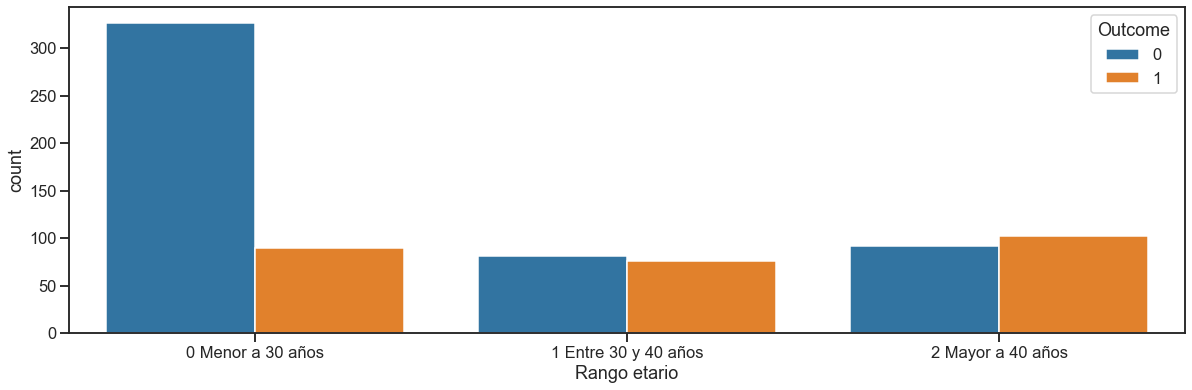

In [129]:
plt.figure(figsize=(20,6))
sns.countplot(data=diabetes_df.sort_values('Banda',ascending=True),x="Banda",hue="Outcome")
plt.xlabel("Rango etario")

La proporción de personas con Diabetes parece aumentar con la edad (en la matriz de correlación se puede ver esto), hay un rango etario donde es mucho menos probable tener diabetes aunque también podría ser un tema de datos (revisaría si existen edades = 0 si tuviera que realizar nuevamente el análisis, de hecho revisaría todas las variables = 0), se podrían dividir aún más los rangos etarios para entender si el quiebre se produce antes de los 30 por ejemplo y si existen rangos superiores donde la proporción aumente.